<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [34]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [35]:
#Let's have a quick look:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [36]:
#Let's find the shape of the dataframe:
netflix_df.shape

(4812, 11)

In [37]:
#Let's find the datatypes
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [38]:
#Let's get some more information:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [39]:
#Let's check to confirm, if there aren't any duplicate rows:
duplicated_rows_df=netflix_df[(netflix_df.duplicated())]
number_of_duplicated_rows=print(duplicated_rows_df.shape)

(0, 11)


In [40]:
#Let's also check, if there aren't any null values:
null_values=netflix_df.isnull().sum()
print(null_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [41]:
sum_null_values=netflix_df.isnull().sum().sum()
print(sum_null_values)

0


In [42]:
#Let's see the column profiles (if applicable):
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [43]:
#Let's find the number of movies as per their types:
movies_vs_tv_df=netflix_df.value_counts('type')
print(movies_vs_tv_df)

type
Movie      4677
TV Show     135
dtype: int64


In [44]:
movies_df=netflix_df[netflix_df['type']=='Movie']
print(movies_df.value_counts('type'))

type
Movie    4677
dtype: int64


In [45]:
#Let's filter out the movies that were released between 1990 and 2000:
movies_90_df=movies_df[(movies_df['release_year']>=1990) & (movies_df['release_year']<2000)]
print(movies_90_df.value_counts('type'))

type
Movie    183
dtype: int64


In [46]:
#Let's check the data on these movies
mod_movies_90_df=movies_90_df[['title','country','genre','release_year','duration']]
print(mod_movies_90_df)

                                title        country  ... release_year  duration
6                                 187  United States  ...         1997       119
118                 A Dangerous Woman  United States  ...         1993       101
145            A Night at the Roxbury  United States  ...         1998        82
167   A Thin Line Between Love & Hate  United States  ...         1996       108
194                      Aashik Awara          India  ...         1993       154
...                               ...            ...  ...          ...       ...
4672                      West Beirut         France  ...         1999       106
4689      What's Eating Gilbert Grape  United States  ...         1993       118
4718                   Wild Wild West  United States  ...         1999       106
4746                       Wyatt Earp  United States  ...         1994       191
4756                      Yaar Gaddar          India  ...         1994       148

[183 rows x 5 columns]


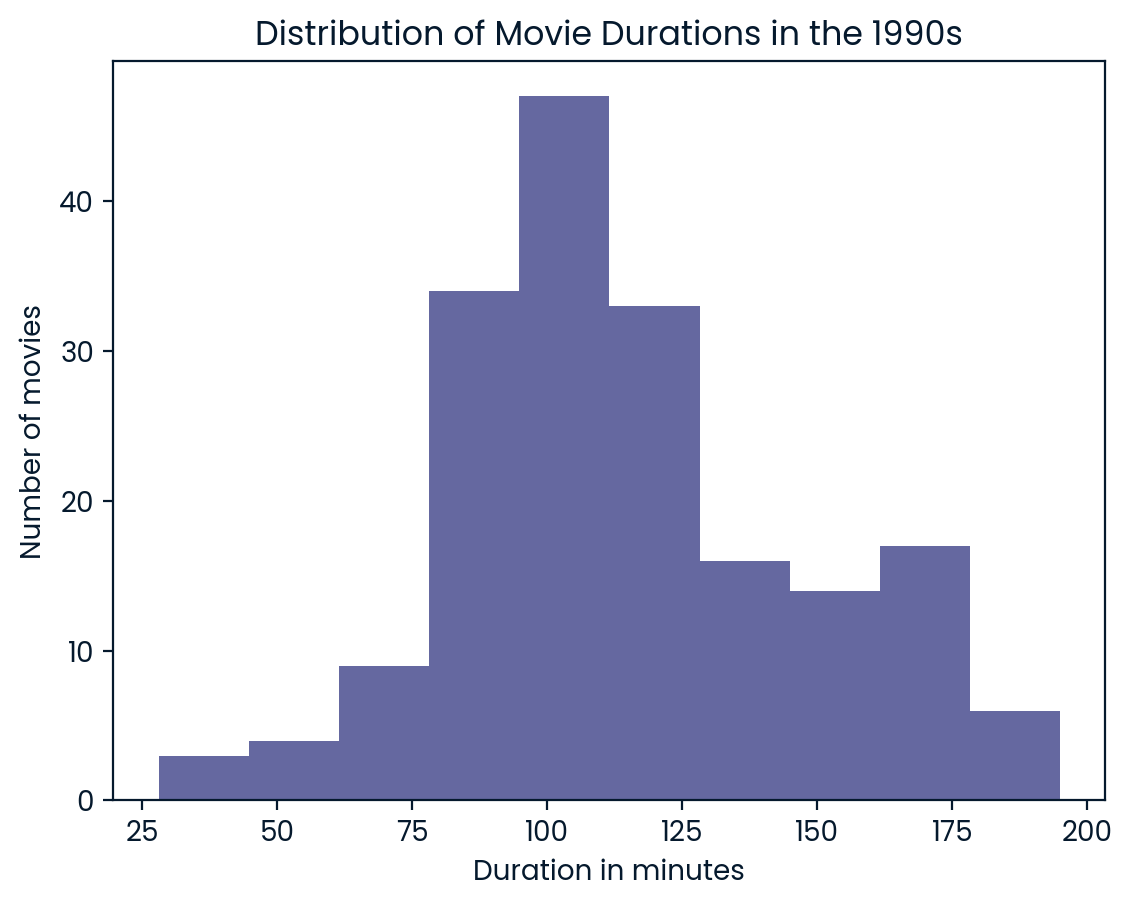

In [47]:
#Let's find the most frequent duration of these movies:
plt.hist(mod_movies_90_df['duration'])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of movies')
plt.show()
duration=100

In [48]:
#Let's find the number of action movies that were released between 1990 and 2000:
action_movie=mod_movies_90_df[mod_movies_90_df['genre']=='Action']
print(action_movie.value_counts('genre'))

genre
Action    48
dtype: int64


In [49]:
#Let's find the number of action movies that were released between 1990 and 2000 and their duration was less than 90 minutes:
short_action_movie=action_movie[action_movie['duration']<90]
short_movie_count=short_action_movie.value_counts('genre').sum()
print(short_movie_count)

7
